In [1]:
import pandas as pd
import warnings
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_ = pd.read_csv('churn_train.csv')
df = df_.copy()
df

,year,month,user_account_id,user_lifetime,user_intake,user_no_outgoing_activity_in_days,user_account_balance_last,user_spendings,user_has_outgoing_calls,user_has_outgoing_sms,...,last_100_calls_outgoing_duration,last_100_calls_outgoing_to_onnet_duration,last_100_calls_outgoing_to_offnet_duration,last_100_calls_outgoing_to_abroad_duration,last_100_sms_outgoing_count,last_100_sms_outgoing_to_onnet_count,last_100_sms_outgoing_to_offnet_count,last_100_sms_outgoing_to_abroad_count,last_100_gprs_usage,churn
0,2013,6,202550,1835,0,1,9.66,2.26,1,1,...,45.35,0.0,26.62,0.00,390,10,115,10,0.00,0
1,2013,6,930164,536,0,10,54.92,0.60,1,1,...,24.98,0.0,23.90,0.00,52,0,52,0,0.00,0
2,2013,6,46907,1046,0,1,16.25,13.47,1,1,...,116.47,15.2,65.65,31.28,262,0,199,11,0.00,0
3,2013,8,1174456,15947,0,8,0.00,0.00,1,0,...,0.00,0.0,0.00,0.00,0,0,0,0,0.00,0
4,2013,6,300131,1630,0,1,6.14,3.76,1,1,...,30.38,0.0,8.00,0.00,61,0,60,0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2013,6,1150129,80,0,24,11.60,2.53,1,0,...,33.43,0.0,21.70,0.00,0,0,0,0,0.00,0
59996,2013,6,950606,326,0,3,3.75,4.25,1,1,...,40.35,0.0,6.22,0.00,142,0,73,61,0.00,0
59997,2013,6,1100429,138,0,1,22.53,37.45,1,1,...,669.35,0.0,413.05,0.00,1087,0,233,0,1.15,0
59998,2013,8,1193962,15947,0,8,0.00,0.00,0,0,...,0.00,0.0,0.00,0.00,0,0,0,0,0.00,0


In [3]:
last_date = df['user_lifetime'].max()
min_date = df['user_lifetime'].min()
print("Veride gözlemlenen ilk işlem tarihi:", min_date)
print("Veride gözlemlenen son işlem tarihi:", last_date)
print("--------------------------------------")

Veride gözlemlenen ilk işlem tarihi: 0
Veride gözlemlenen son işlem tarihi: 15947
--------------------------------------


In [4]:
df = df[df['user_lifetime'] != min_date]

df.head()


,year,month,user_account_id,user_lifetime,user_intake,user_no_outgoing_activity_in_days,user_account_balance_last,user_spendings,user_has_outgoing_calls,user_has_outgoing_sms,...,last_100_calls_outgoing_duration,last_100_calls_outgoing_to_onnet_duration,last_100_calls_outgoing_to_offnet_duration,last_100_calls_outgoing_to_abroad_duration,last_100_sms_outgoing_count,last_100_sms_outgoing_to_onnet_count,last_100_sms_outgoing_to_offnet_count,last_100_sms_outgoing_to_abroad_count,last_100_gprs_usage,churn
0,2013,6,202550,1835,0,1,9.66,2.26,1,1,...,45.35,0.0,26.62,0.00,390,10,115,10,0.0,0
1,2013,6,930164,536,0,10,54.92,0.60,1,1,...,24.98,0.0,23.90,0.00,52,0,52,0,0.0,0
2,2013,6,46907,1046,0,1,16.25,13.47,1,1,...,116.47,15.2,65.65,31.28,262,0,199,11,0.0,0
3,2013,8,1174456,15947,0,8,0.00,0.00,1,0,...,0.00,0.0,0.00,0.00,0,0,0,0,0.0,0
4,2013,6,300131,1630,0,1,6.14,3.76,1,1,...,30.38,0.0,8.00,0.00,61,0,60,0,0.0,0


In [5]:
last_date = df['user_lifetime'].max()
min_date = df['user_lifetime'].min()
print("Veride gözlemlenen ilk işlem tarihi:", min_date)
print("Veride gözlemlenen son işlem tarihi:", last_date)
print("--------------------------------------")

Veride gözlemlenen ilk işlem tarihi: 1
Veride gözlemlenen son işlem tarihi: 15947
--------------------------------------


In [6]:
df['user_account_id'].nunique() #Tekil user sayısı

59971

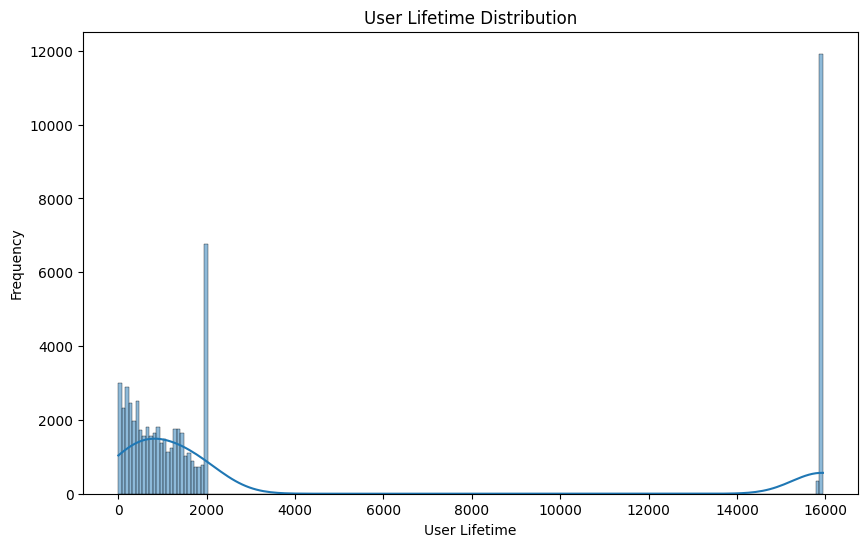

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['user_lifetime'], kde=True)
plt.title('User Lifetime Distribution')
plt.xlabel('User Lifetime')
plt.ylabel('Frequency')
plt.show()


In [9]:
result = df.groupby(pd.cut(df['user_lifetime'], range(int(min_date), int(last_date) + 2000, 2000))).size().reset_index(name='user_account_count')

result.rename(columns={'user_lifetime': 'user_lifetime_range'}, inplace=True)

# Display the result
result


,user_lifetime_range,user_account_count
0,"(1, 2001]",47663
1,"(2001, 4001]",0
2,"(4001, 6001]",0
3,"(6001, 8001]",0
4,"(8001, 10001]",0
5,"(10001, 12001]",0
6,"(12001, 14001]",0
7,"(14001, 16001]",12258


In [10]:
churn_1 = df[df['churn'] == 1]
churn_1_distribution = churn_1.groupby(pd.cut(churn_1['user_lifetime'], range(int(min_date), int(last_date) + 2000, 2000))).size().reset_index(name='churn_user_count')
churn_1_distribution.rename(columns={'user_lifetime': 'user_lifetime_range'}, inplace=True)
churn_1_distribution


,user_lifetime_range,churn_user_count
0,"(1, 2001]",4643
1,"(2001, 4001]",0
2,"(4001, 6001]",0
3,"(6001, 8001]",0
4,"(8001, 10001]",0
5,"(10001, 12001]",0
6,"(12001, 14001]",0
7,"(14001, 16001]",7888


In [11]:

# Merge the two dataframes to calculate the percentage
merged_df = pd.merge(result, churn_1_distribution, on='user_lifetime_range', how='left')

# Fill NaN values in 'churn_user_count' with 0
merged_df['churn_user_count'].fillna(0, inplace=True)

# Calculate the percentage
merged_df['churn_percentage'] = (merged_df['churn_user_count'] / merged_df['user_account_count']) * 100

# Display the result
merged_df


,user_lifetime_range,user_account_count,churn_user_count,churn_percentage
0,"(1, 2001]",47663,4643,9.741309
1,"(2001, 4001]",0,0,NaN
2,"(4001, 6001]",0,0,NaN
3,"(6001, 8001]",0,0,NaN
4,"(8001, 10001]",0,0,NaN
5,"(10001, 12001]",0,0,NaN
6,"(12001, 14001]",0,0,NaN
7,"(14001, 16001]",12258,7888,64.349812


<Axes: xlabel='user_lifetime', ylabel='Count'>

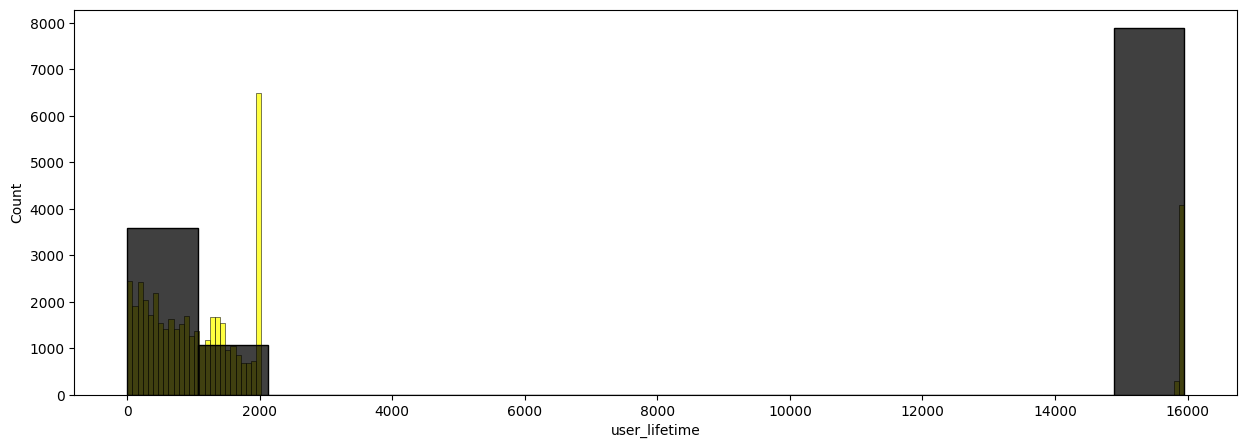

In [12]:
plt.figure(figsize = (15, 5))
sns.histplot(df[df['churn'] == 0]['user_lifetime'], color = "yellow")
sns.histplot(df[df['churn'] == 1]['user_lifetime'], color = "black")

In [13]:
churn_df = df[df['user_lifetime'] >= 14001]

churn_df


,year,month,user_account_id,user_lifetime,user_intake,user_no_outgoing_activity_in_days,user_account_balance_last,user_spendings,user_has_outgoing_calls,user_has_outgoing_sms,...,last_100_calls_outgoing_duration,last_100_calls_outgoing_to_onnet_duration,last_100_calls_outgoing_to_offnet_duration,last_100_calls_outgoing_to_abroad_duration,last_100_sms_outgoing_count,last_100_sms_outgoing_to_onnet_count,last_100_sms_outgoing_to_offnet_count,last_100_sms_outgoing_to_abroad_count,last_100_gprs_usage,churn
3,2013,8,1174456,15947,0,8,0.00,0.00,1,0,...,0.0,0.0,0.00,0.0,0,0,0,0,0.0,0
8,2013,8,1193499,15947,0,8,0.00,0.00,0,0,...,0.0,0.0,0.00,0.0,0,0,0,0,0.0,1
13,2013,7,1172688,15916,0,100,0.00,0.00,0,0,...,0.0,0.0,0.00,0.0,0,0,0,0,0.0,0
16,2013,6,1160320,15885,0,1,0.00,0.00,1,0,...,0.0,0.0,0.00,0.0,0,0,0,0,0.0,0
21,2013,8,1191214,15947,0,8,0.00,0.00,0,0,...,0.0,0.0,0.00,0.0,0,0,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59981,2013,8,1195117,15945,1,1,14.64,0.36,1,1,...,2.6,0.0,1.17,0.0,3,0,3,0,0.0,0
59985,2013,8,1196338,15947,0,1,0.00,0.00,0,0,...,0.0,0.0,0.00,0.0,0,0,0,0,0.0,1
59986,2013,8,1194801,15947,0,5,0.00,0.00,0,0,...,0.0,0.0,0.00,0.0,0,0,0,0,0.0,1
59987,2013,6,978303,15885,0,1276,0.00,0.00,0,0,...,0.0,0.0,0.00,0.0,0,0,0,0,0.0,1


In [14]:

churn_1_count = churn_df[churn_df['churn'] == 1].shape[0]
print(f"Churn = 1 sayısı: {churn_1_count}")
churn_0_count = churn_df[churn_df['churn'] == 0].shape[0]
print(f"Churn = 0 sayısı: {churn_0_count}")

Churn = 1 sayısı: 7888
Churn = 0 sayısı: 4370


<Axes: xlabel='user_lifetime', ylabel='Count'>

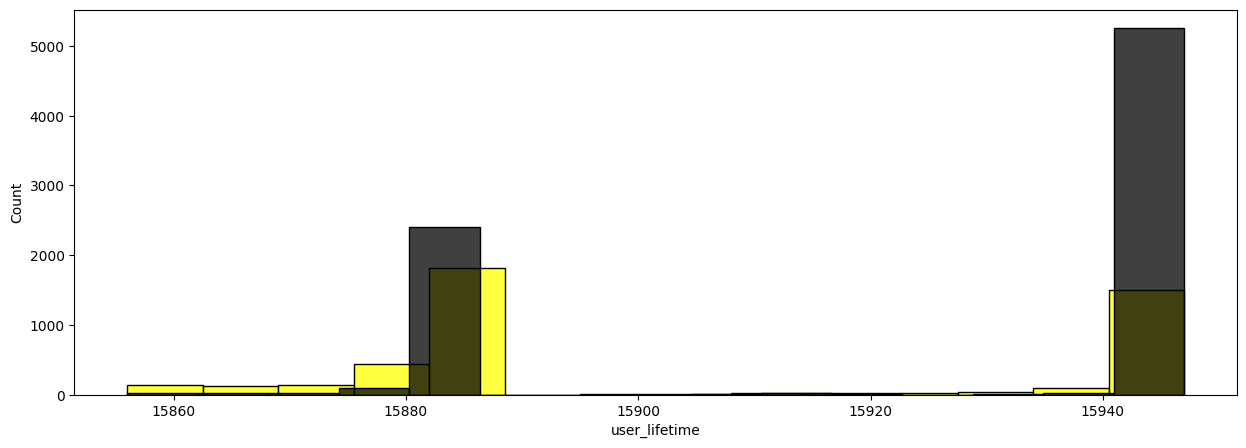

In [15]:
plt.figure(figsize = (15, 5))
sns.histplot(churn_df[churn_df['churn'] == 0]['user_lifetime'], color = "yellow")
sns.histplot(churn_df[churn_df['churn'] == 1]['user_lifetime'], color = "black")